In [29]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset from disk
path = 'Dataset/DATASET_BIONNE_UPDATED/DATASET_BIONNE/en/BioASQ_NNER_dict_separated_splitted_V4'  # Update this path to your actual file location
dataset = load_from_disk(path)
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6'],
        num_rows: 866
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6'],
        num_rows: 217
    })
})

In [30]:
# Inspect the dataset's features to understand the structure
print(dataset['train'].features)

{'id': Value(dtype='string', id=None), 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'ner_tags1': Sequence(feature=ClassLabel(names=['O', 'B-DISO', 'I-DISO', 'B-CHEM', 'I-CHEM', 'B-ANATOMY', 'I-ANATOMY', 'B-FINDING', 'I-FINDING', 'B-LABPROC', 'I-LABPROC', 'B-PHYS', 'I-PHYS', 'B-INJURY_POISONING', 'I-INJURY_POISONING', 'B-DEVICE', 'I-DEVICE'], id=None), length=-1, id=None), 'ner_tags2': Sequence(feature=ClassLabel(names=['O', 'B-DISO', 'I-DISO', 'B-CHEM', 'I-CHEM', 'B-ANATOMY', 'I-ANATOMY', 'B-FINDING', 'I-FINDING', 'B-LABPROC', 'I-LABPROC', 'B-PHYS', 'I-PHYS', 'B-INJURY_POISONING', 'I-INJURY_POISONING', 'B-DEVICE', 'I-DEVICE'], id=None), length=-1, id=None), 'ner_tags3': Sequence(feature=ClassLabel(names=['O', 'B-DISO', 'I-DISO', 'B-CHEM', 'I-CHEM', 'B-ANATOMY', 'I-ANATOMY', 'B-FINDING', 'I-FINDING', 'B-LABPROC', 'I-LABPROC', 'B-PHYS', 'I-PHYS', 'B-INJURY_POISONING', 'I-INJURY_POISONING', 'B-DEVICE', 'I-DEVICE'], id=None), length=-1, id=None), 'ner_tag

In [31]:
# Retrieve the first row of the training dataset
example_row = dataset['train'][0]
#example_row


In [32]:
def find_row_with_non_zero_tags(dataset):
    # Iterate through each split and each entry
    for split in dataset.keys():
        for entry in dataset[split]:
            # Check if all the specified tag sequences contain at least one non-zero value
            if all(any(tag != 0 for tag in entry[tag_sequence_name]) for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']):
                return split, entry

# Call the function to find the row
split_found, row_found = find_row_with_non_zero_tags(dataset)
#row_found


In [33]:
# Assuming 'dataset' is your loaded dataset and focusing on 'ner_tags1' for this example
ner_tags_feature = dataset['train'].features['ner_tags1'].feature
ner_tags_feature

ClassLabel(names=['O', 'B-DISO', 'I-DISO', 'B-CHEM', 'I-CHEM', 'B-ANATOMY', 'I-ANATOMY', 'B-FINDING', 'I-FINDING', 'B-LABPROC', 'I-LABPROC', 'B-PHYS', 'I-PHYS', 'B-INJURY_POISONING', 'I-INJURY_POISONING', 'B-DEVICE', 'I-DEVICE'], id=None)

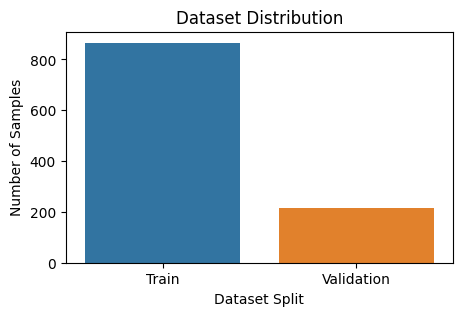

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of samples in each split
train_size = len(dataset['train'])
validation_size = len(dataset['validation'])

# Dataset distribution
dataset_sizes = {'Train': train_size, 'Validation': validation_size}

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x=list(dataset_sizes.keys()), y=list(dataset_sizes.values()))
plt.title('Dataset Distribution')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.show()


In [35]:

from collections import Counter


# Initialize a Counter object to store NER tag counts
ner_tag_counts = Counter()

# Iterate through each subset of the dataset (train, validation, test)
for split in dataset:
    # Iterate through each entry in the current subset
    for entry in dataset[split]:
        # Iterate through each NER tag sequence in the current entry
        for tag_sequence_key in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 
                                 'ner_tags5', 'ner_tags6']:
            # Update the NER tag counts based on the current tag sequence
            ner_tag_counts.update(entry[tag_sequence_key])

# Convert the Counter object to a dictionary for easier handling or visualization
ner_tag_counts_dict = dict(ner_tag_counts)

# Output the NER tag counts
print(ner_tag_counts_dict)


{0: 166526, 7: 810, 8: 2839, 1: 2245, 2: 1745, 11: 784, 12: 703, 5: 1824, 3: 1161, 6: 940, 9: 355, 4: 534, 10: 265, 13: 111, 14: 77, 15: 48, 16: 53}


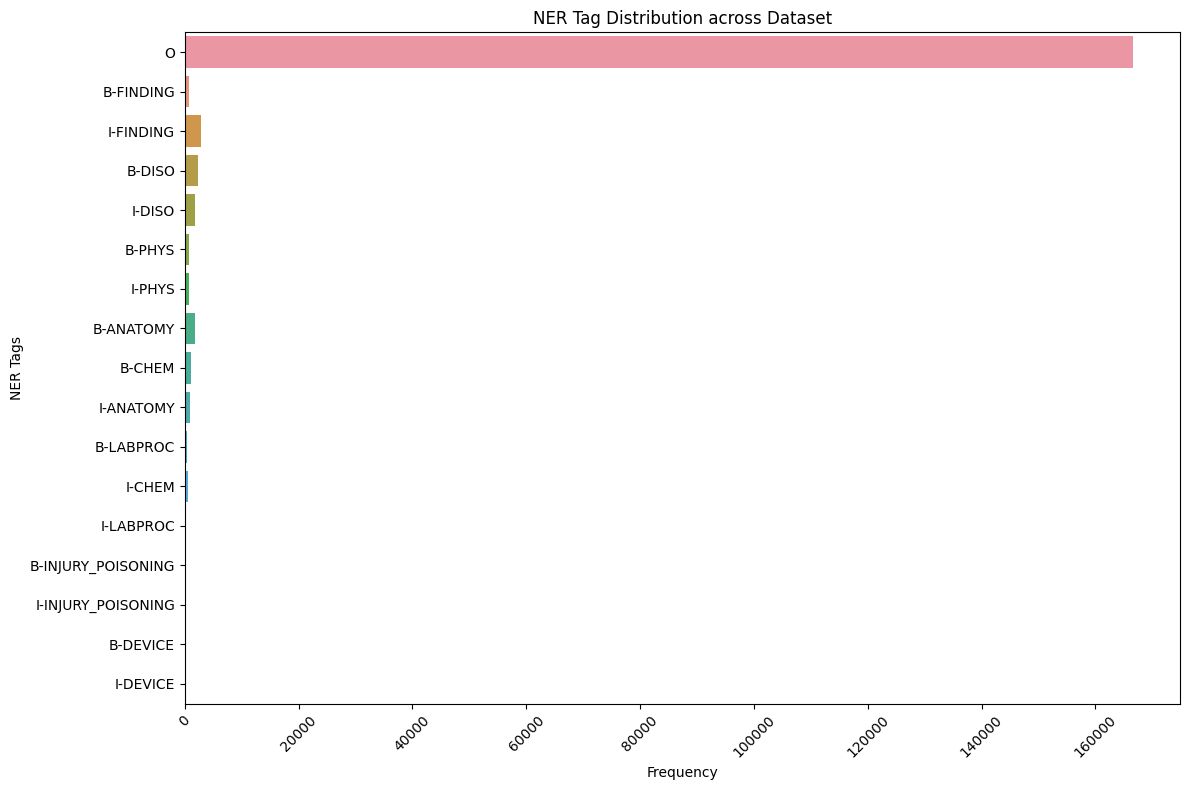

In [36]:
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate Tag Counts
def aggregate_ner_tag_counts(dataset):
    tag_counter = Counter()
    # Assuming the dataset is loaded and has the structure as described
    for split in dataset.keys():  # Iterate through each split (train, validation, test)
        for entry in dataset[split]:
            for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']:
                tag_sequence = entry[tag_sequence_name]
                tag_counter.update(tag_sequence)
    return tag_counter

# Get aggregated NER tag counts
ner_tag_counts = aggregate_ner_tag_counts(dataset)

# Step 2: Plot Tag Distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=list(ner_tag_counts.values()), y=[dataset['train'].features['ner_tags1'].feature.names[tag] for tag in ner_tag_counts.keys()])
plt.title('NER Tag Distribution across Dataset')
plt.xlabel('Frequency')
plt.ylabel('NER Tags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
del ner_tag_counts["O"]
ner_tag_counts

Counter({0: 166526,
         7: 810,
         8: 2839,
         1: 2245,
         2: 1745,
         11: 784,
         12: 703,
         5: 1824,
         3: 1161,
         6: 940,
         9: 355,
         4: 534,
         10: 265,
         13: 111,
         14: 77,
         15: 48,
         16: 53})

In [38]:
y=[dataset['train'].features['ner_tags1'].feature.names[tag] for tag in ner_tag_counts.keys()]
y

['O',
 'B-FINDING',
 'I-FINDING',
 'B-DISO',
 'I-DISO',
 'B-PHYS',
 'I-PHYS',
 'B-ANATOMY',
 'B-CHEM',
 'I-ANATOMY',
 'B-LABPROC',
 'I-CHEM',
 'I-LABPROC',
 'B-INJURY_POISONING',
 'I-INJURY_POISONING',
 'B-DEVICE',
 'I-DEVICE']

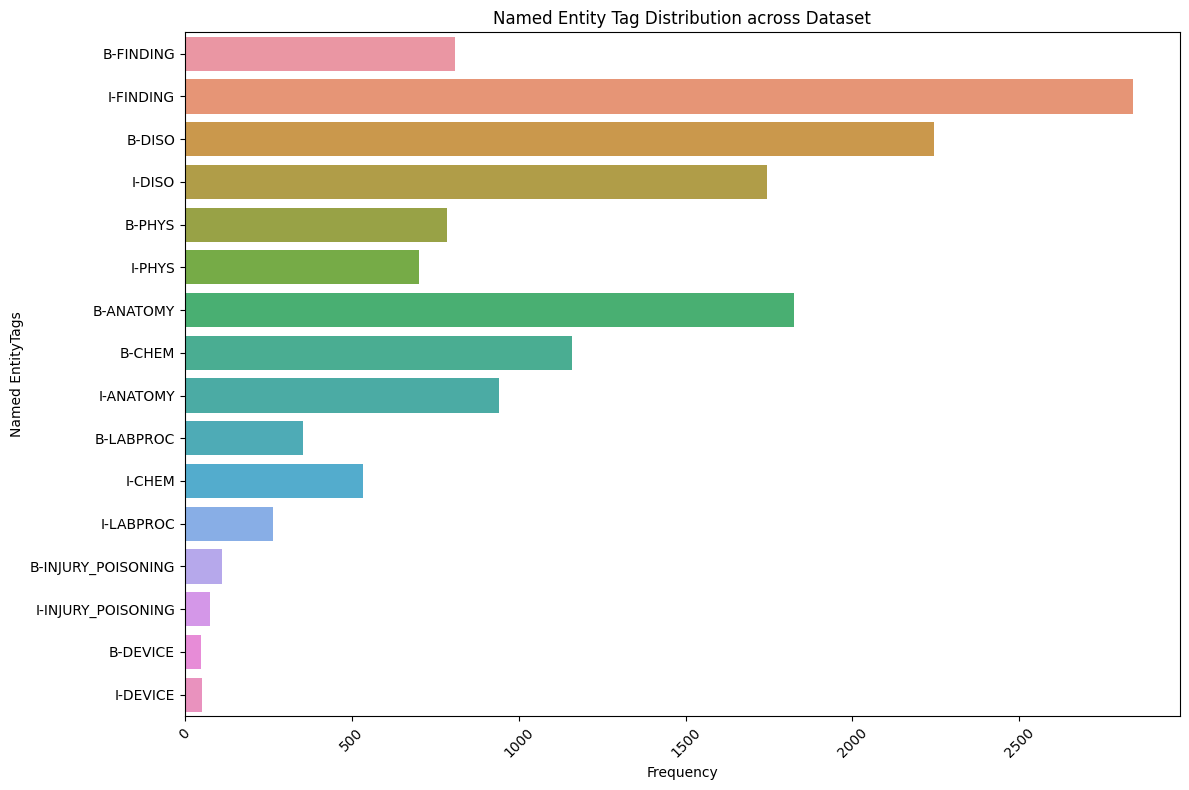

In [57]:
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate Tag Counts
def aggregate_ner_tag_counts(dataset):
    tag_counter = Counter()
    # Assuming the dataset is loaded and has the structure as described
    for split in dataset.keys():  # Iterate through each split (train, validation, test)
        for entry in dataset[split]:
            for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']:
                tag_sequence = entry[tag_sequence_name]
                tag_counter.update(tag_sequence)
    return tag_counter

# Get aggregated NER tag counts
ner_tag_counts = aggregate_ner_tag_counts(dataset)
del ner_tag_counts[0]
# Step 2: Plot Tag Distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=list(ner_tag_counts.values()), y=[dataset['train'].features['ner_tags1'].feature.names[tag] for tag in ner_tag_counts.keys()])
plt.title('Named Entity Tag Distribution across Dataset')
plt.xlabel('Frequency')
plt.ylabel('Named EntityTags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('NER_Distribution.svg', bbox_inches='tight')
plt.show()


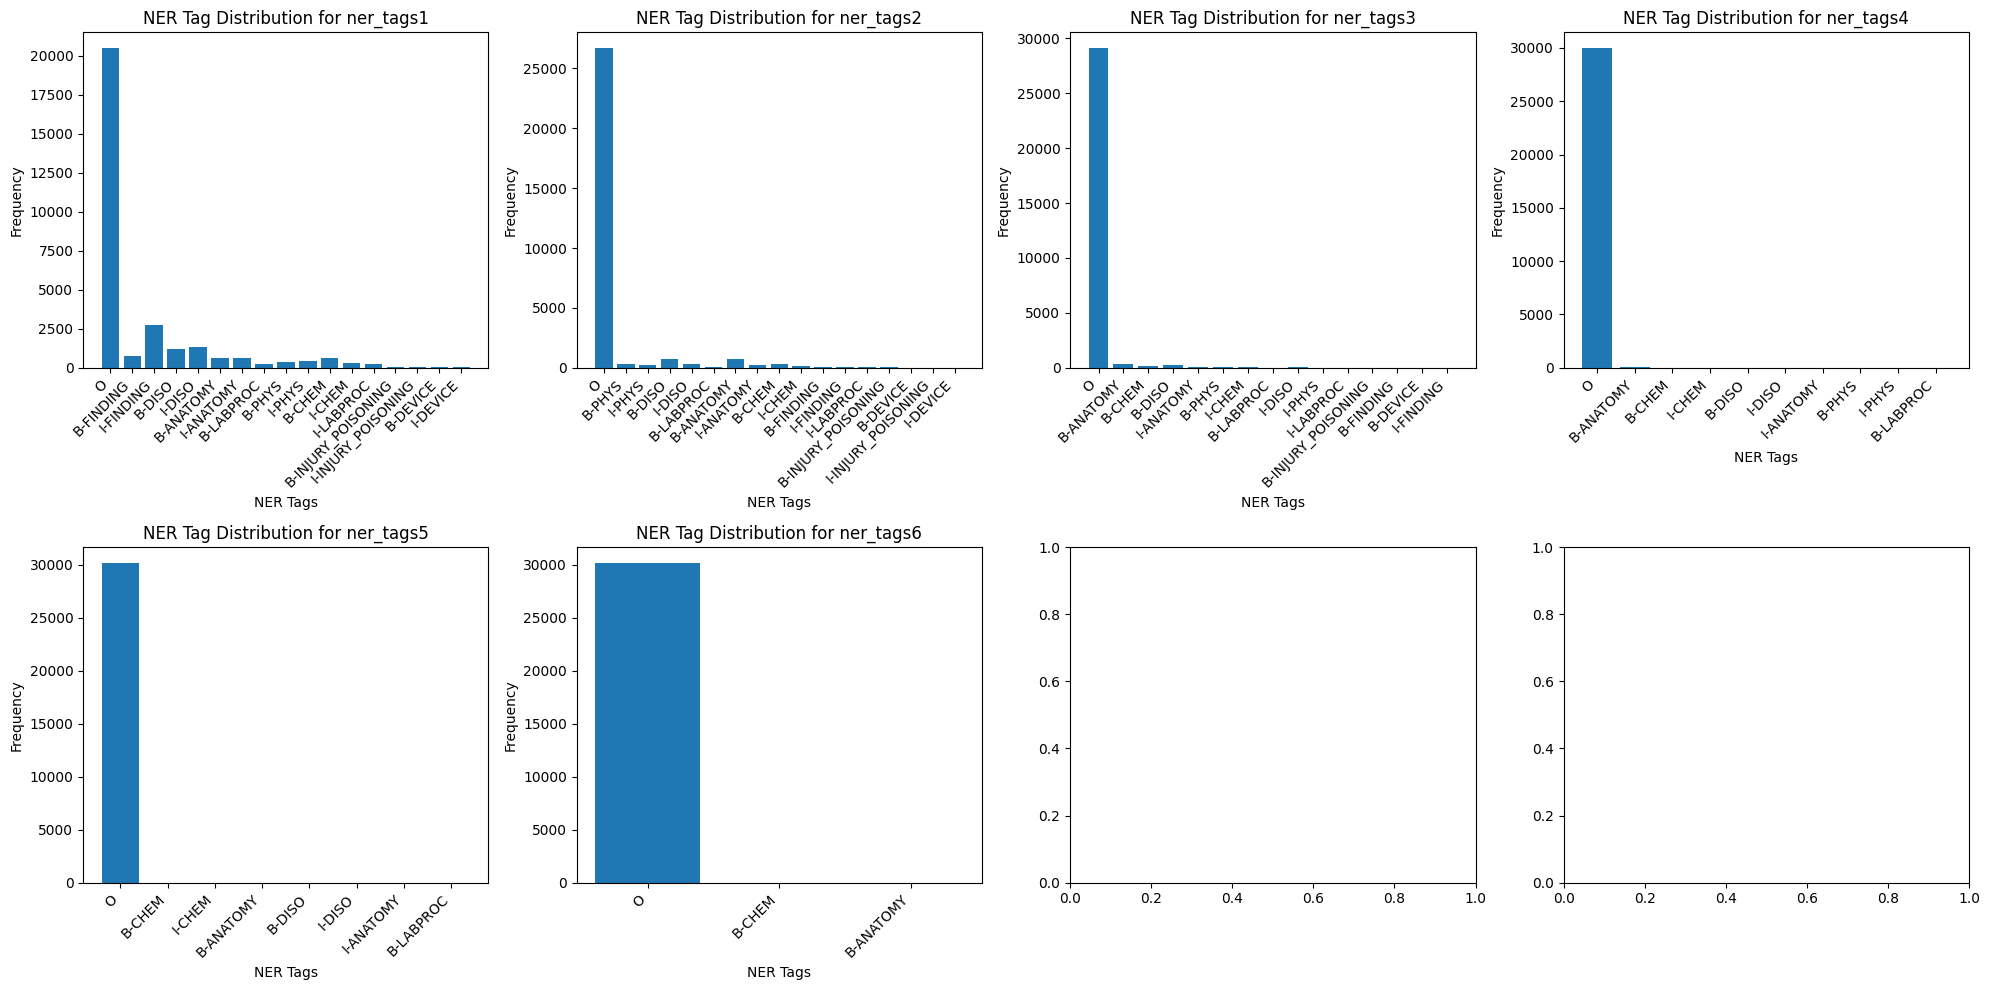

In [41]:
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate Tag Counts
def aggregate_ner_tag_counts(dataset):
    tag_counters = {tag_sequence_name: Counter() for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']}
    # Assuming the dataset is loaded and has the structure as described
    for split in dataset.keys():  # Iterate through each split (train, validation, test)
        for entry in dataset[split]:
            for tag_sequence_name in tag_counters.keys():
                tag_sequence = entry[tag_sequence_name]
                tag_counters[tag_sequence_name].update(tag_sequence)
    return tag_counters

# Get aggregated NER tag counts
ner_tag_counters = aggregate_ner_tag_counts(dataset)

# Step 2: Plot Tag Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

for i, (tag_sequence_name, tag_counter) in enumerate(ner_tag_counters.items()):
    ax = axes[i // 4, i % 4]
    tags = [dataset['train'].features[tag_sequence_name].feature.names[tag] for tag in tag_counter.keys()]
    frequencies = list(tag_counter.values())
    ax.bar(tags, frequencies)
    ax.set_title(f'NER Tag Distribution for {tag_sequence_name}')
    ax.set_xlabel('NER Tags')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(tags)))
    ax.set_xticklabels(tags, rotation=45, ha='right')

plt.tight_layout()
plt.show()


{'ner_tags1': Counter({8: 2744, 2: 1329, 1: 1207, 7: 739, 3: 641, 5: 600, 6: 600, 12: 416, 11: 395, 4: 332, 9: 236, 10: 233, 13: 69, 14: 62, 16: 45, 15: 32}), 'ner_tags2': Counter({1: 774, 5: 709, 3: 355, 2: 353, 11: 301, 12: 260, 6: 250, 4: 145, 8: 94, 9: 90, 7: 65, 13: 32, 10: 28, 14: 15, 15: 12, 16: 8}), 'ner_tags3': Counter({5: 389, 1: 228, 3: 134, 11: 79, 6: 78, 2: 53, 4: 45, 9: 24, 12: 23, 13: 10, 7: 6, 10: 4, 15: 4, 8: 1}), 'ner_tags4': Counter({5: 108, 1: 28, 3: 24, 4: 9, 2: 9, 11: 9, 6: 8, 12: 4, 9: 4}), 'ner_tags5': Counter({5: 15, 1: 8, 3: 5, 6: 4, 4: 3, 2: 1, 9: 1}), 'ner_tags6': Counter({5: 3, 3: 2})}


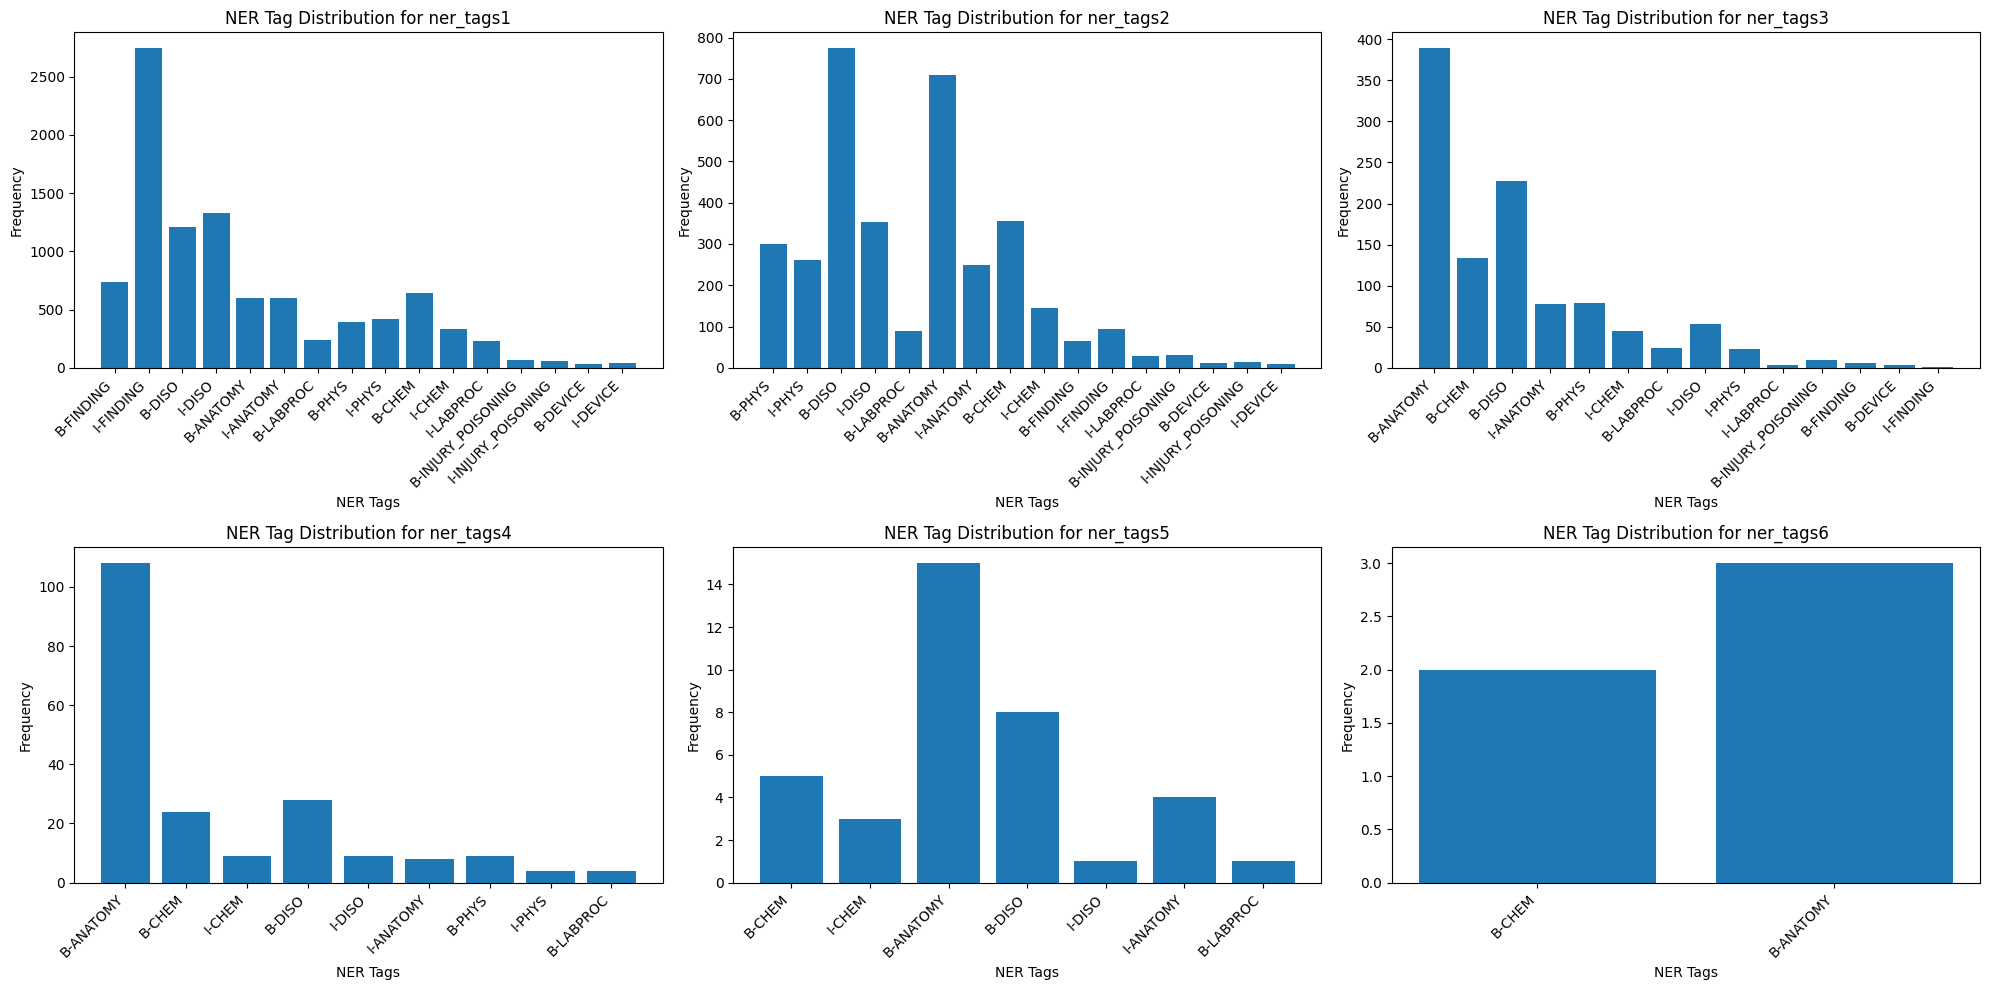

In [42]:
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate Tag Counts
def aggregate_ner_tag_counts(dataset):
    tag_counters = {tag_sequence_name: Counter() for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']}
    # Assuming the dataset is loaded and has the structure as described
    for split in dataset.keys():  # Iterate through each split (train, validation, test)
        for entry in dataset[split]:
            for tag_sequence_name in tag_counters.keys():
                tag_sequence = entry[tag_sequence_name]
                tag_counters[tag_sequence_name].update(tag_sequence)
    return tag_counters

# Get aggregated NER tag counts
ner_tag_counters = aggregate_ner_tag_counts(dataset)
# Remove Counter for 0
for tag_sequence_name, tag_counter in ner_tag_counters.items():
    if 0 in tag_counter:
        del tag_counter[0]

print(ner_tag_counters)


# Step 2: Plot Tag Distribution
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

for i, (tag_sequence_name, tag_counter) in enumerate(ner_tag_counters.items()):
    ax = axes[i // 3, i % 3]
    tags = [dataset['train'].features[tag_sequence_name].feature.names[tag] for tag in tag_counter.keys()]
    frequencies = list(tag_counter.values())
    ax.bar(tags, frequencies)
    ax.set_title(f'NER Tag Distribution for {tag_sequence_name}')
    ax.set_xlabel('NER Tags')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(tags)))
    ax.set_xticklabels(tags, rotation=45, ha='right')

plt.tight_layout()
plt.show()


{'ner_tags1': Counter({8: 2744, 2: 1329, 1: 1207, 7: 739, 3: 641, 5: 600, 6: 600, 12: 416, 11: 395, 4: 332, 9: 236, 10: 233, 13: 69, 14: 62, 16: 45, 15: 32}), 'ner_tags2': Counter({1: 774, 5: 709, 3: 355, 2: 353, 11: 301, 12: 260, 6: 250, 4: 145, 8: 94, 9: 90, 7: 65, 13: 32, 10: 28, 14: 15, 15: 12, 16: 8}), 'ner_tags3': Counter({5: 389, 1: 228, 3: 134, 11: 79, 6: 78, 2: 53, 4: 45, 9: 24, 12: 23, 13: 10, 7: 6, 10: 4, 15: 4, 8: 1, 14: 0, 16: 0}), 'ner_tags4': Counter({5: 108, 1: 28, 3: 24, 4: 9, 2: 9, 11: 9, 6: 8, 12: 4, 9: 4, 7: 0, 8: 0, 10: 0, 13: 0, 14: 0, 15: 0, 16: 0}), 'ner_tags5': Counter({5: 15, 1: 8, 3: 5, 6: 4, 4: 3, 2: 1, 9: 1, 7: 0, 8: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0}), 'ner_tags6': Counter({5: 3, 3: 2, 1: 0, 2: 0, 4: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0})}


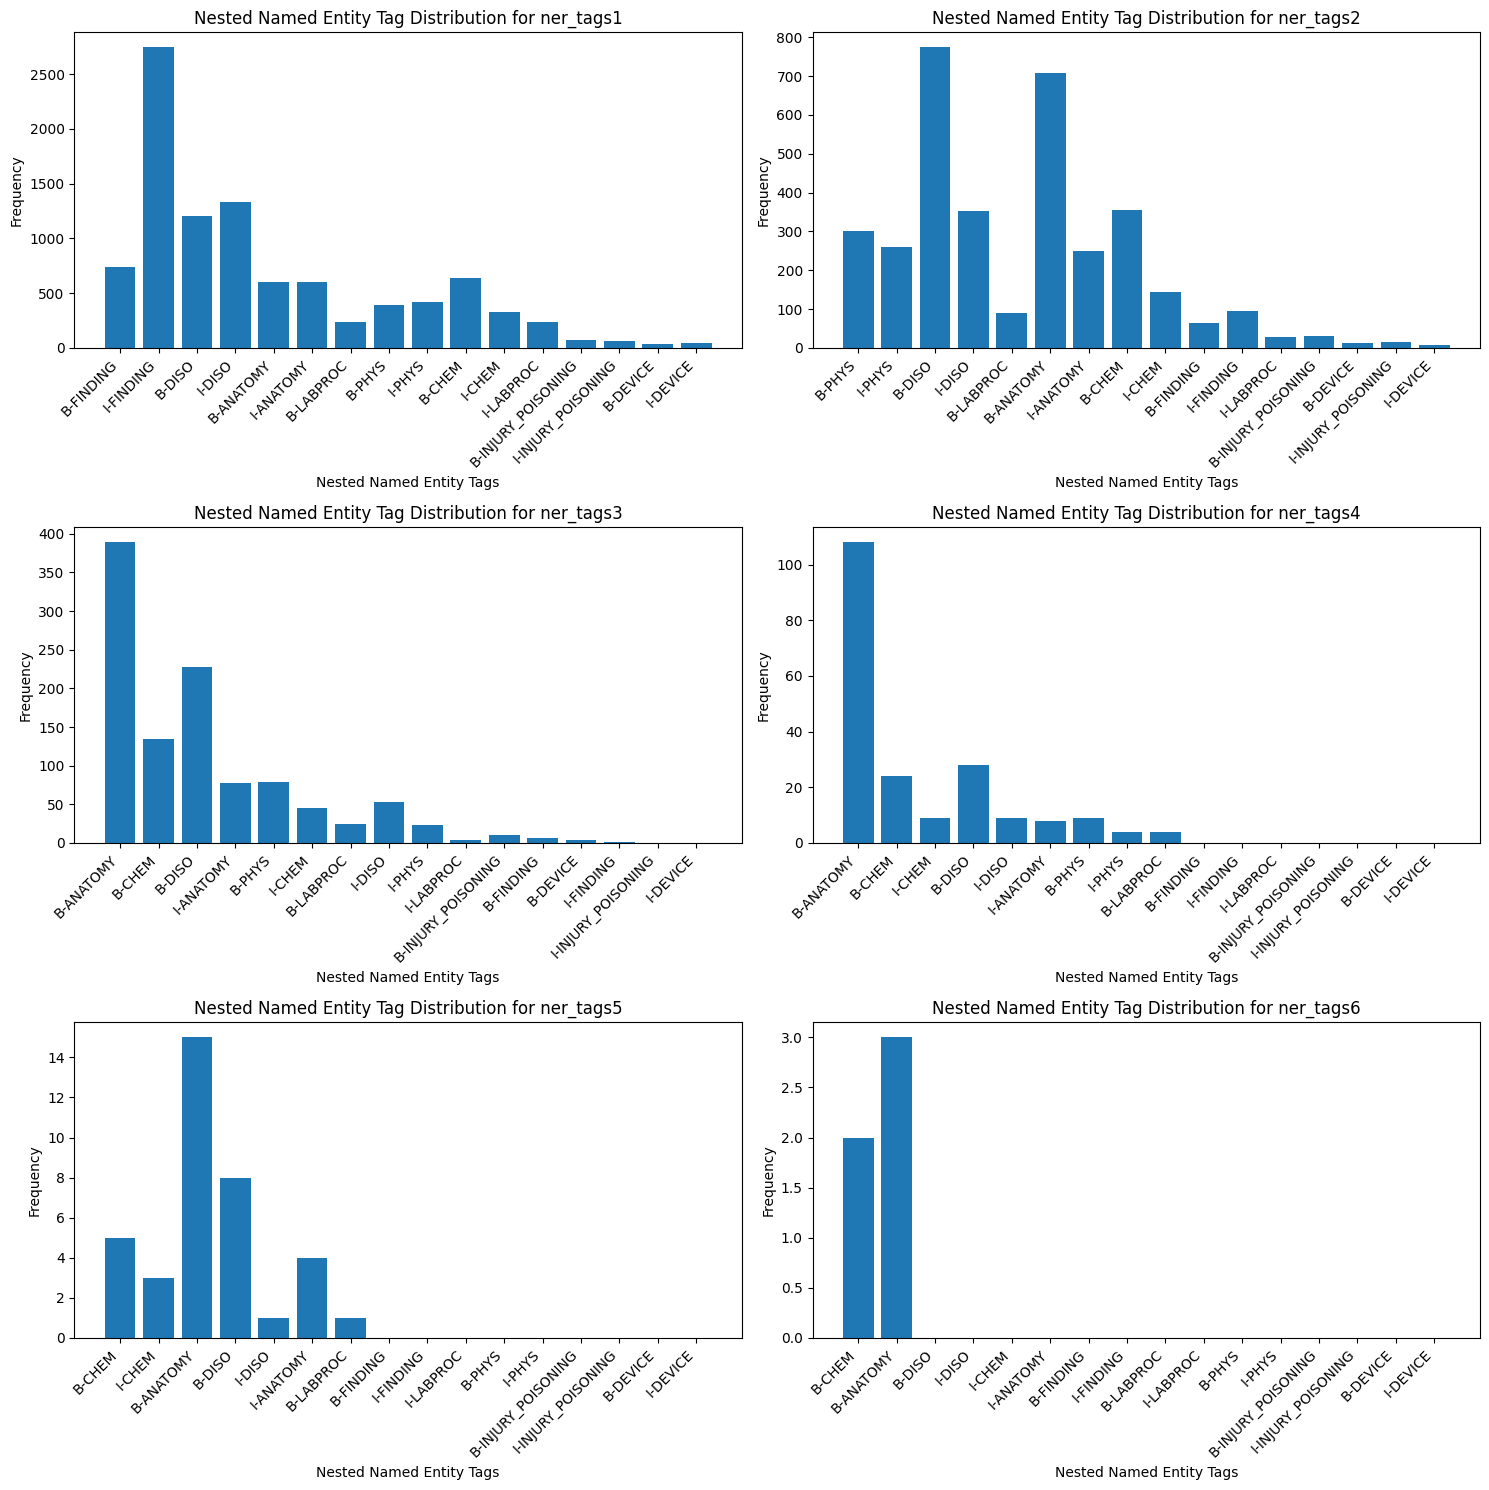

In [58]:
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate Tag Counts
def aggregate_ner_tag_counts(dataset):
    tag_counters = {tag_sequence_name: Counter() for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']}
    # Assuming the dataset is loaded and has the structure as described
    for split in dataset.keys():  # Iterate through each split (train, validation, test)
        for entry in dataset[split]:
            for tag_sequence_name in tag_counters.keys():
                tag_sequence = entry[tag_sequence_name]
                tag_counters[tag_sequence_name].update(tag_sequence)
    return tag_counters

# Get aggregated NER tag counts
ner_tag_counters = aggregate_ner_tag_counts(dataset)
# Remove Counter for 0
for tag_sequence_name, tag_counter in ner_tag_counters.items():
    if 0 in tag_counter:
        del tag_counter[0]

# Define the range of numbers
numbers_range = range(1, 17)

# Fill in missing counters with frequency 0 for each dictionary
for key, counter in ner_tag_counters.items():
    for number in numbers_range:
        if number not in counter:
            counter[number] = 0
            
print(ner_tag_counters)


# Step 2: Plot Tag Distribution
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

for i, (tag_sequence_name, tag_counter) in enumerate(ner_tag_counters.items()):
    ax = axes[i // 2, i % 2]
    tags = [dataset['train'].features[tag_sequence_name].feature.names[tag] for tag in tag_counter.keys()]
    frequencies = list(tag_counter.values())
    ax.bar(tags, frequencies)
    ax.set_title(f'Nested Named Entity Tag Distribution for {tag_sequence_name}')
    ax.set_xlabel('Nested Named Entity Tags')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(tags)))
    ax.set_xticklabels(tags, rotation=45, ha='right')

plt.tight_layout()
plt.savefig('ner_level.svg', bbox_inches='tight')
plt.show()


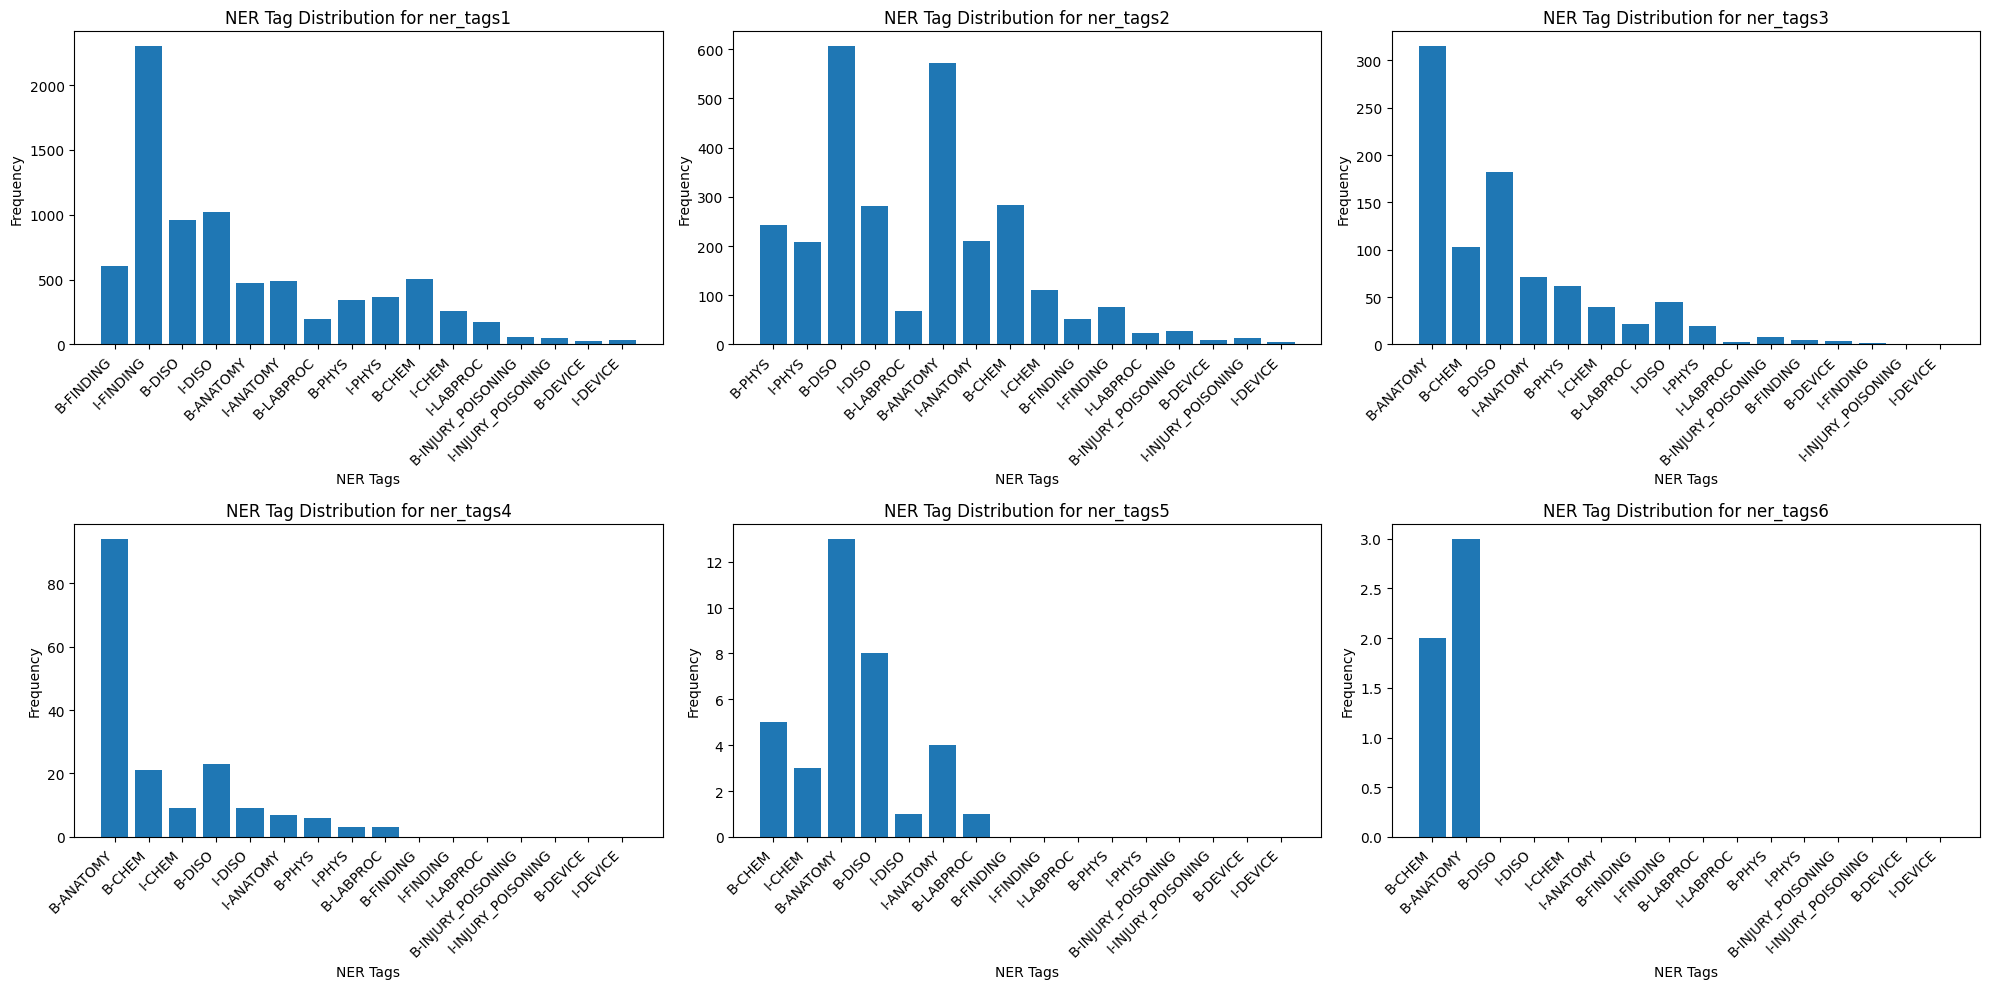

In [15]:
########################################################################## Separate Training   ##########################################################
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Aggregate Tag Counts
def aggregate_ner_tag_counts(dataset):
    tag_counters = {tag_sequence_name: Counter() for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']}
    # Assuming the dataset is loaded and has the structure as described
    for entry in dataset['train']:  # Iterate through train split only
        for tag_sequence_name in tag_counters.keys():
            tag_sequence = entry[tag_sequence_name]
            tag_counters[tag_sequence_name].update(tag_sequence)
    return tag_counters

# Get aggregated NER tag counts
ner_tag_counters = aggregate_ner_tag_counts(dataset)
# Remove Counter for 0
for tag_sequence_name, tag_counter in ner_tag_counters.items():
    if 0 in tag_counter:
        del tag_counter[0]

# Define the range of numbers
numbers_range = range(1, 17)

# Fill in missing counters with frequency 0 for each dictionary
for key, counter in ner_tag_counters.items():
    for number in numbers_range:
        if number not in counter:
            counter[number] = 0
            
# Step 2: Plot Tag Distribution
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

for i, (tag_sequence_name, tag_counter) in enumerate(ner_tag_counters.items()):
    ax = axes[i // 3, i % 3]
    tags = [dataset['train'].features[tag_sequence_name].feature.names[tag] for tag in tag_counter.keys()]
    frequencies = list(tag_counter.values())
    ax.bar(tags, frequencies)
    ax.set_title(f'NER Tag Distribution for {tag_sequence_name}')
    ax.set_xlabel('NER Tags')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(tags)))
    ax.set_xticklabels(tags, rotation=45, ha='right')

plt.tight_layout()
plt.show()



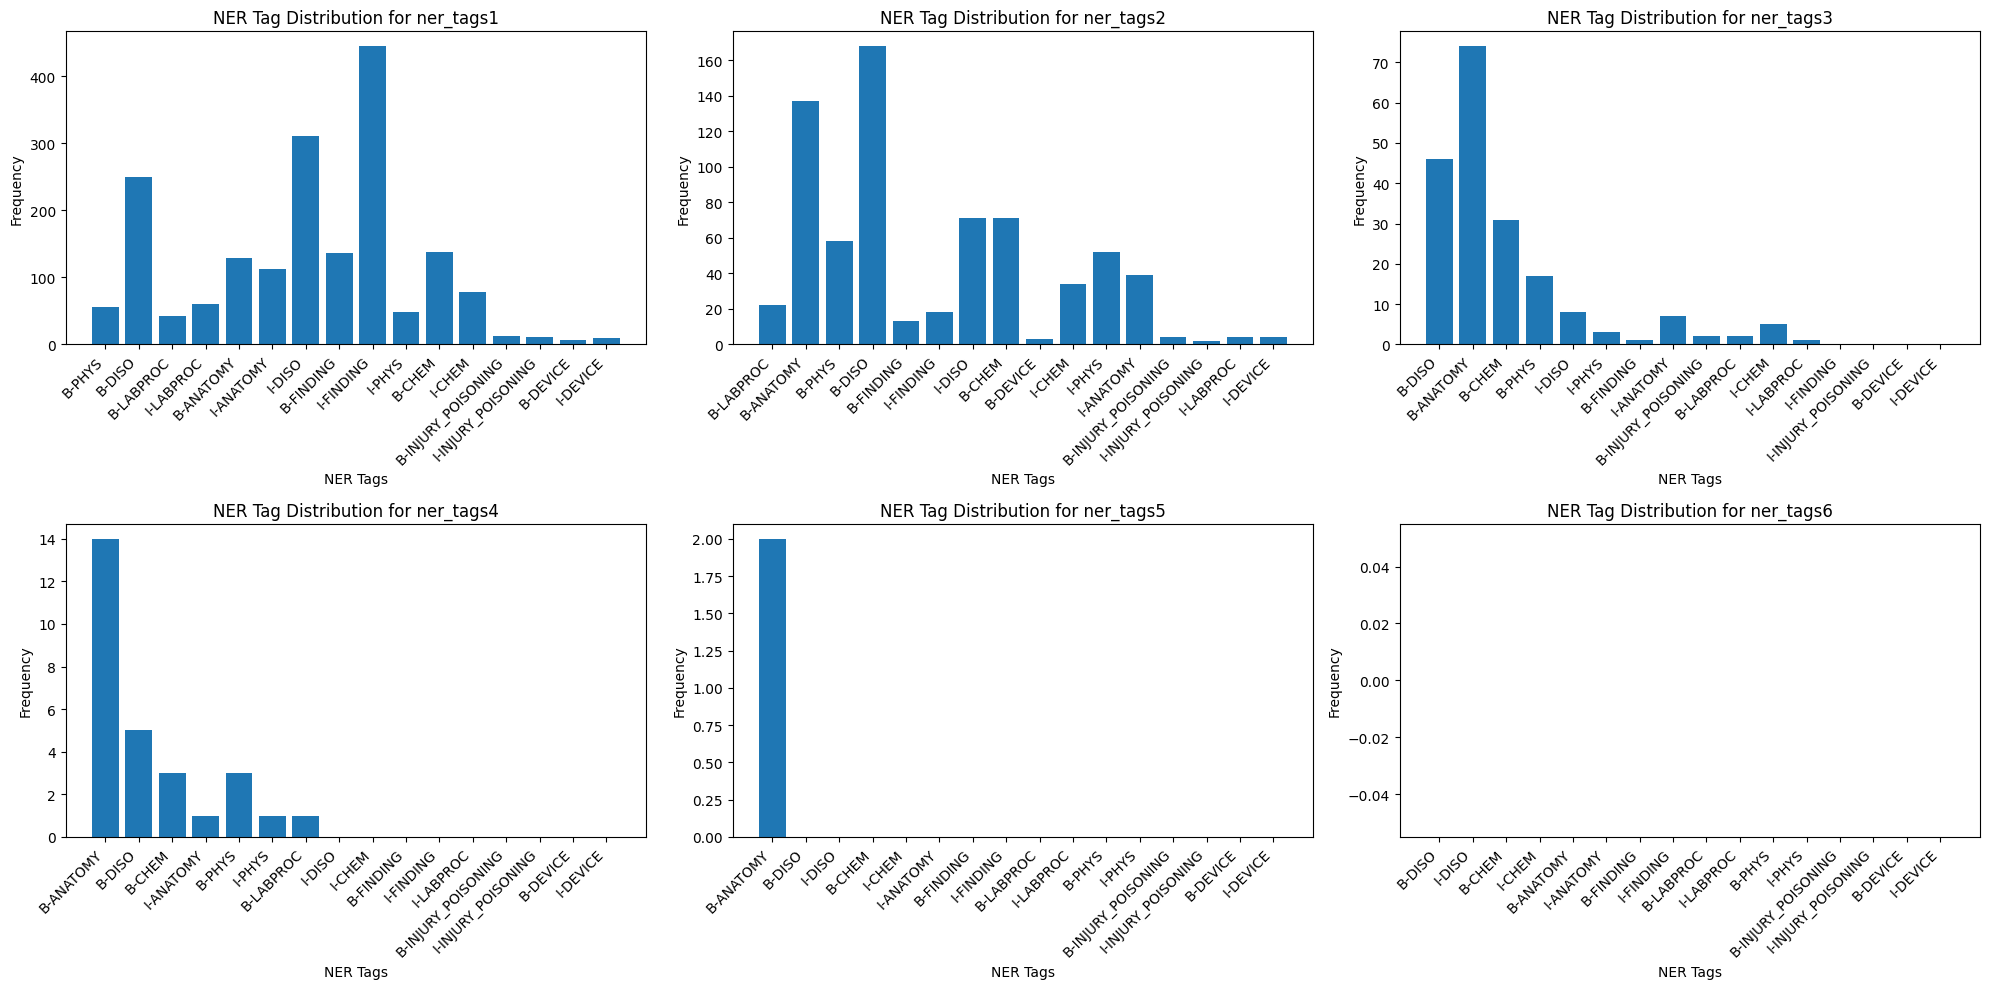

In [16]:
########################################################################## Separate validation   ##########################################################
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Aggregate Tag Counts
def aggregate_ner_tag_counts(dataset):
    tag_counters = {tag_sequence_name: Counter() for tag_sequence_name in ['ner_tags1', 'ner_tags2', 'ner_tags3', 'ner_tags4', 'ner_tags5', 'ner_tags6']}
    # Assuming the dataset is loaded and has the structure as described
    for entry in dataset['validation']:  # Iterate through train split only
        for tag_sequence_name in tag_counters.keys():
            tag_sequence = entry[tag_sequence_name]
            tag_counters[tag_sequence_name].update(tag_sequence)
    return tag_counters

# Get aggregated NER tag counts
ner_tag_counters = aggregate_ner_tag_counts(dataset)
# Remove Counter for 0
for tag_sequence_name, tag_counter in ner_tag_counters.items():
    if 0 in tag_counter:
        del tag_counter[0]

# Define the range of numbers
numbers_range = range(1, 17)

# Fill in missing counters with frequency 0 for each dictionary
for key, counter in ner_tag_counters.items():
    for number in numbers_range:
        if number not in counter:
            counter[number] = 0
            
# Step 2: Plot Tag Distribution
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

for i, (tag_sequence_name, tag_counter) in enumerate(ner_tag_counters.items()):
    ax = axes[i // 3, i % 3]
    tags = [dataset['train'].features[tag_sequence_name].feature.names[tag] for tag in tag_counter.keys()]
    frequencies = list(tag_counter.values())
    ax.bar(tags, frequencies)
    ax.set_title(f'NER Tag Distribution for {tag_sequence_name}')
    ax.set_xlabel('NER Tags')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(tags)))
    ax.set_xticklabels(tags, rotation=45, ha='right')

plt.tight_layout()
plt.show()



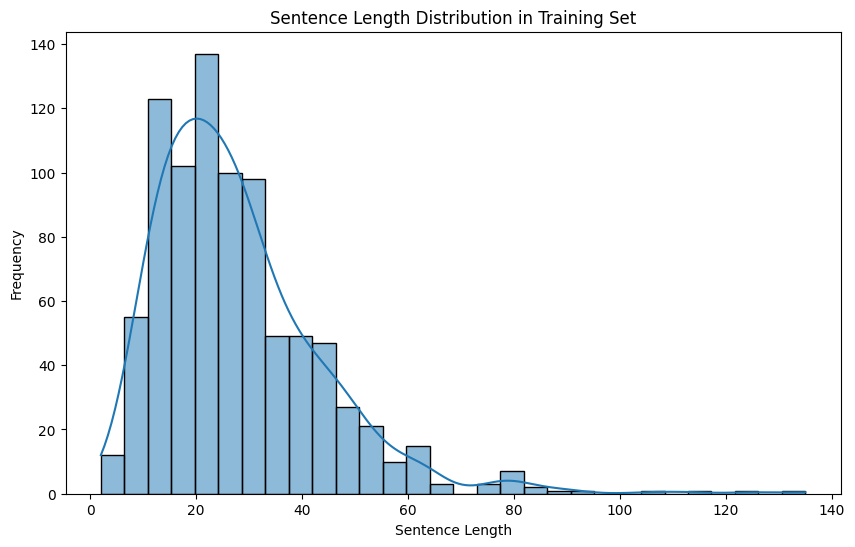

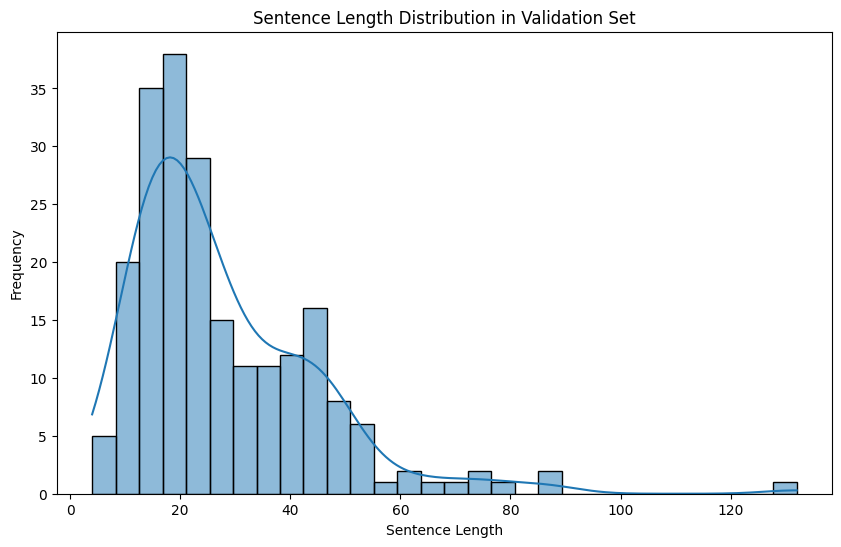

In [17]:

def plot_sentence_length_distribution(dataset_split, title='Sentence Length Distribution'):
    """Plot the distribution of sentence lengths across a dataset split."""
    sentence_lengths = [len(example['tokens']) for example in dataset_split]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(sentence_lengths, bins=30, kde=True)
    plt.title(title)
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()

# Adjust the ner_tags_column parameter to the specific NER tag column you're interested in

plot_sentence_length_distribution(dataset['train'], title='Sentence Length Distribution in Training Set')
plot_sentence_length_distribution(dataset['validation'], title='Sentence Length Distribution in Validation Set')


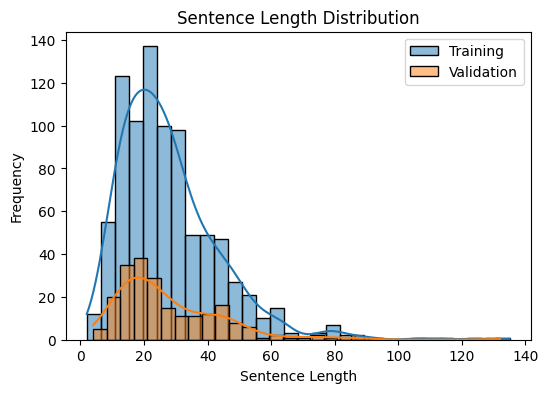

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentence_length_distribution(dataset_splits, labels, title='Sentence Length Distribution'):
    """Plot the distribution of sentence lengths across multiple dataset splits."""
    all_sentence_lengths = []
    for split in dataset_splits:
        sentence_lengths = [len(example['tokens']) for example in split]
        all_sentence_lengths.extend(sentence_lengths)

    plt.figure(figsize=(6, 4))
    for lengths, label in zip(dataset_splits, labels):
        sns.histplot([len(example['tokens']) for example in lengths], bins=30, kde=True, label=label)
    plt.title(title)
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Assuming dataset_splits contains the train, validation, and test splits
dataset_splits = [dataset['train'], dataset['validation']]
labels = ['Training', 'Validation']

plot_sentence_length_distribution(dataset_splits, labels, title='Sentence Length Distribution')
